In [32]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [33]:
data = pd.read_csv("/content/food_nutrients - Sheet1.csv")

In [34]:
data 

,FoodID,SurveyID,FoodName,Energywithdietaryfibre(kJ),Energywithoutdietaryfibre(kJ),Moisture (g),Protein(g),Totalfat(g),Availablecarbohydrateswithsugaralcohols(g),Availablecarbohydrateswithoutsugaralcohol(g),...,Totalmonounsaturatedfat(g),Totalpolyunsaturatedfat(g),Linoleic acid (g),Alpha-linolenic acid (g),C20:5w3 Eicosapentaenoic (mg),C22:5w3 Docosapentaenoic (mg),C22:6w3 Docosahexaenoic (mg),Total long chain omega 3 fatty acids (mg),Totaltransfattyacids(mg),G.I
0,10F40019,31103001,vvvv,401,401,56.6,16.6,0.2,6.5,6.5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00
1,13A12001,31302001,Basil,1079,774,10.0,18.2,5.5,15.5,15.5,...,1.40,0.61,0.26,0.34,0.00,0.00,0.00,0.000,0.00,5.00
2,10E10113,31302002,Cardamom,1333,1109,8.3,10.8,6.7,40.5,40.5,...,2.81,1.39,1.00,0.39,0.00,0.00,0.00,0.000,0.00,83.06
3,10E10098,31302003,Chilli (chili) powder,1441,1167,7.8,12.3,16.8,20.5,20.5,...,3.15,7.85,7.32,0.52,0.00,0.00,0.00,0.000,0.00,15.00
4,10E10099,31302005,Cinnamon,1026,591,9.8,4.2,2.7,25.5,25.5,...,0.96,0.22,0.17,0.04,0.00,0.00,0.00,0.000,0.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,02E10488,13303073,"Cake, tea cake, commercial, uniced",1433,1420,33.0,4.9,17.7,41.5,41.4,...,7.26,1.55,1.37,0.15,0.05,1.45,9.37,10.873,463.02,63.00
1041,02E10522,13303074,"Cake, tea cake, apricot, homemade from basic i...",1500,1480,30.9,5.5,19.7,39.5,39.2,...,4.82,2.34,1.93,0.36,2.21,11.65,9.04,22.894,725.93,64.00
1042,02E10461,13303075,"Cake, tea cake, cinnamon topped, homemade from...",1413,1402,33.6,3.9,16.7,43.9,43.8,...,4.39,2.16,1.77,0.34,2.13,10.95,4.24,17.325,718.23,65.00
1043,02E10644,13303076,"Cake, custard filled, with & without icing",1400,1390,31.4,6.2,14.1,46.2,46.2,...,4.02,0.71,0.55,0.13,0.05,0.86,10.16,11.064,76.00,66.00


In [6]:
data.is.nan

SyntaxError: ignored

SyntaxError: ignored

In [35]:
items = ['FoodID','SurveyID','FoodName']

In [36]:
data = data.drop(items,axis=1)

In [37]:
data

,Energywithdietaryfibre(kJ),Energywithoutdietaryfibre(kJ),Moisture (g),Protein(g),Totalfat(g),Availablecarbohydrateswithsugaralcohols(g),Availablecarbohydrateswithoutsugaralcohol(g),Starch(g),Totalsugars(g),Addedsugars(g),...,Totalmonounsaturatedfat(g),Totalpolyunsaturatedfat(g),Linoleic acid (g),Alpha-linolenic acid (g),C20:5w3 Eicosapentaenoic (mg),C22:5w3 Docosapentaenoic (mg),C22:6w3 Docosahexaenoic (mg),Total long chain omega 3 fatty acids (mg),Totaltransfattyacids(mg),G.I
0,401,401,56.6,16.6,0.2,6.5,6.5,6.5,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00
1,1079,774,10.0,18.2,5.5,15.5,15.5,15.5,0.0,0.0,...,1.40,0.61,0.26,0.34,0.00,0.00,0.00,0.000,0.00,5.00
2,1333,1109,8.3,10.8,6.7,40.5,40.5,31.0,9.5,0.0,...,2.81,1.39,1.00,0.39,0.00,0.00,0.00,0.000,0.00,83.06
3,1441,1167,7.8,12.3,16.8,20.5,20.5,10.4,10.1,0.0,...,3.15,7.85,7.32,0.52,0.00,0.00,0.00,0.000,0.00,15.00
4,1026,591,9.8,4.2,2.7,25.5,25.5,11.7,13.8,0.0,...,0.96,0.22,0.17,0.04,0.00,0.00,0.00,0.000,0.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1433,1420,33.0,4.9,17.7,41.5,41.4,15.9,25.5,22.0,...,7.26,1.55,1.37,0.15,0.05,1.45,9.37,10.873,463.02,63.00
1041,1500,1480,30.9,5.5,19.7,39.5,39.2,19.4,19.9,17.3,...,4.82,2.34,1.93,0.36,2.21,11.65,9.04,22.894,725.93,64.00
1042,1413,1402,33.6,3.9,16.7,43.9,43.8,15.2,28.6,24.0,...,4.39,2.16,1.77,0.34,2.13,10.95,4.24,17.325,718.23,65.00
1043,1400,1390,31.4,6.2,14.1,46.2,46.2,25.1,21.1,19.6,...,4.02,0.71,0.55,0.13,0.05,0.86,10.16,11.064,76.00,66.00


In [38]:
data.corr()

,Energywithdietaryfibre(kJ),Energywithoutdietaryfibre(kJ),Moisture (g),Protein(g),Totalfat(g),Availablecarbohydrateswithsugaralcohols(g),Availablecarbohydrateswithoutsugaralcohol(g),Starch(g),Totalsugars(g),Addedsugars(g),...,Totalmonounsaturatedfat(g),Totalpolyunsaturatedfat(g),Linoleic acid (g),Alpha-linolenic acid (g),C20:5w3 Eicosapentaenoic (mg),C22:5w3 Docosapentaenoic (mg),C22:6w3 Docosahexaenoic (mg),Total long chain omega 3 fatty acids (mg),Totaltransfattyacids(mg),G.I
Energywithdietaryfibre(kJ),1.000000,0.997621,-0.951131,0.580787,0.719395,0.871541,0.871613,0.668520,0.518943,0.477377,...,0.648368,0.471216,0.471342,0.316888,0.125238,0.150307,0.114491,0.174106,0.441568,0.055773
Energywithoutdietaryfibre(kJ),0.997621,1.000000,-0.938066,0.559134,0.729009,0.871858,0.871940,0.657807,0.535350,0.499499,...,0.657566,0.460378,0.461926,0.306929,0.131279,0.146656,0.120674,0.176291,0.460072,0.069407
Moisture (g),-0.951131,-0.938066,1.000000,-0.650340,-0.538254,-0.910991,-0.911030,-0.757203,-0.453938,-0.395317,...,-0.495493,-0.400355,-0.399764,-0.270671,-0.070795,-0.106453,-0.068057,-0.112872,-0.292704,-0.030872
Protein(g),0.580787,0.559134,-0.650340,1.000000,0.232199,0.490404,0.490567,0.602203,-0.041207,-0.099046,...,0.263339,0.345410,0.330492,0.318803,0.078180,0.039836,0.049331,0.065826,0.055698,0.060223
Totalfat(g),0.719395,0.729009,-0.538254,0.232199,1.000000,0.353535,0.353629,0.099329,0.471756,0.469002,...,0.864750,0.579994,0.574359,0.405189,0.223497,0.251867,0.189770,0.293990,0.680706,0.101940
Availablecarbohydrateswithsugaralcohols(g),0.871541,0.871858,-0.910991,0.490404,0.353535,1.000000,0.999973,0.815313,0.518446,0.471553,...,0.334826,0.217629,0.227153,0.113542,0.024187,0.036148,0.042874,0.047760,0.209341,0.095830
Availablecarbohydrateswithoutsugaralcohol(g),0.871613,0.871940,-0.911030,0.490567,0.353629,0.999973,1.000000,0.815418,0.518336,0.471708,...,0.334883,0.217687,0.227190,0.113674,0.024239,0.036185,0.042920,0.047816,0.209367,0.095934
Starch(g),0.668520,0.657807,-0.757203,0.602203,0.099329,0.815313,0.815418,1.000000,-0.069178,-0.077848,...,0.123502,0.190382,0.193736,0.128752,-0.014214,-0.019484,-0.024089,-0.026492,-0.037172,0.152413
Totalsugars(g),0.518943,0.535350,-0.453938,-0.041207,0.471756,0.518446,0.518336,-0.069178,1.000000,0.931941,...,0.402939,0.097632,0.108923,0.008722,0.065039,0.093200,0.112324,0.124627,0.423548,-0.062748
Addedsugars(g),0.477377,0.499499,-0.395317,-0.099046,0.469002,0.471553,0.471708,-0.077848,0.931941,1.000000,...,0.396298,0.072326,0.080966,0.002712,0.090316,0.101436,0.129819,0.143862,0.435976,-0.012916


In [39]:
X  = data.drop('G.I',axis = 1)

In [40]:
y = data['G.I']

In [41]:
import numpy as np

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(np.any(np.isnan(X_test)))
print(np.any(np.isnan(y_test)))

False
False


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(836, 53) (209, 53) (836,) (209,)


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
Min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [24]:
print(np.any(np.isnan(X_test)))
print(np.any(np.isnan(y_test)))

False
False


In [153]:
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(128,kernel_initializer='normal', activation='relu'))
Dropout(0.2),
model.add(Dense(64,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 256)               13824     
                                                                 
 dense_73 (Dense)            (None, 128)               32896     
                                                                 
 dense_74 (Dense)            (None, 64)                8256      
                                                                 
 dense_75 (Dense)            (None, 1)                 65        
                                                                 
Total params: 55,041
Trainable params: 55,041
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [155]:
from keras.callbacks import EarlyStopping

In [156]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [157]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Epoch 1/5000
17/17 [==============================] - 1s 14ms/step - loss: 2551.6619 - mae: 47.1791 - val_loss: 1186.3545 - val_mae: 30.5405
Epoch 2/5000
17/17 [==============================] - 0s 5ms/step - loss: 755.4056 - mae: 22.9515 - val_loss: 531.6647 - val_mae: 18.2694
Epoch 3/5000
17/17 [==============================] - 0s 4ms/step - loss: 450.2325 - mae: 16.8611 - val_loss: 375.5561 - val_mae: 14.8222
Epoch 4/5000
17/17 [==============================] - 0s 5ms/step - loss: 298.7443 - mae: 13.4954 - val_loss: 306.0716 - val_mae: 12.8824
Epoch 5/5000
17/17 [==============================] - 0s 5ms/step - loss: 238.1275 - mae: 11.5405 - val_loss: 281.1365 - val_mae: 12.3614
Epoch 6/5000
17/17 [==============================] - 0s 5ms/step - loss: 216.7749 - mae: 10.8995 - val_loss: 270.6794 - val_mae: 11.6343
Epoch 7/5000
17/17 [==============================] - 0s 4ms/step - loss: 206.1345 - mae: 10.3735 - val_loss: 264.3865 - val_mae: 11.4059
Epoch 8/5000
17/17 [===========

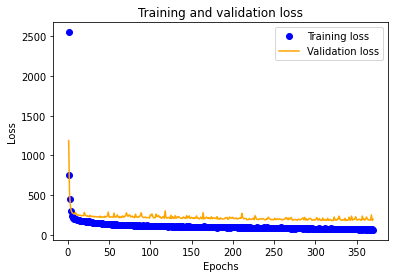

In [158]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


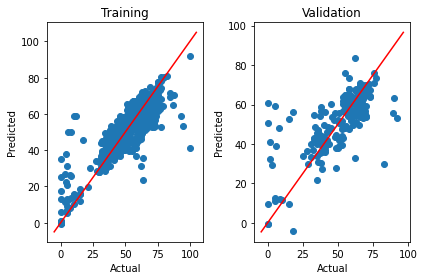

In [159]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [160]:
pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [161]:
trainpreds = model.predict(X_train)


27/27 [==============================] - 0s 1ms/step


In [162]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

5.099190397428696
8.627752205104919


In [163]:
!mkdir -p saved_model
model.save('saved_model/my_model')